In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd

In [301]:
df = pd.read_csv(r"C:\\Users\\ACER\\Downloads\\iphone.csv")
df.head(5)

,Product,Reviewed country,Review Date,isVerified,ratingScore,reviewTitle,reviewDescription,variantAsin,Service Provider,Color,Size
0,Iphone 13,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",B09G9BQS98,Unlocked,Midnight,256 GB
1,Iphone 13,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",B09G9BQS98,Unlocked,Midnight,256 GB
2,Iphone 13,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,B09G9BQS98,Unlocked,Midnight,256 GB
3,Iphone 13,India,24-06-2024,True,5,Product,100% genuine,B09G9BQS98,Unlocked,Midnight,256 GB
4,Iphone 13,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,B09G9BQS98,Unlocked,Midnight,256 GB


In [249]:
print(df.describe())
print('\n\nRATING SCORE STATS:\n\n') 
df['ratingScore'].describe()

       ratingScore
count  3062.000000
mean      3.758981
std       1.579033
min       1.000000
25%       3.000000
50%       5.000000
75%       5.000000
max       5.000000


RATING SCORE STATS:




count    3062.000000
mean        3.758981
std         1.579033
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: ratingScore, dtype: float64

In [250]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Product            3062 non-null   object
 1   Reviewed country   3062 non-null   object
 2   Review Date        3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   variantAsin        3062 non-null   object
 8   Service Provider   3062 non-null   object
 9   Color              3062 non-null   object
 10  Size               3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB
None


In [251]:
print(df['reviewDescription'].describe(),'\n\n')
print(df['reviewDescription'].info())

count     2976
unique    2297
top       Good
freq        32
Name: reviewDescription, dtype: object 


<class 'pandas.core.series.Series'>
RangeIndex: 3062 entries, 0 to 3061
Series name: reviewDescription
Non-Null Count  Dtype 
--------------  ----- 
2976 non-null   object
dtypes: object(1)
memory usage: 24.1+ KB
None


In [252]:
# reviewDescription Total Null Values
print(df['reviewDescription'].isnull().sum())

86


In [253]:
df['reviewDescription'].head(5)

0    Every thing is good about iPhones, there's not...
1    It look so fabulous, I am android user switche...
2    I tried to flip camera while recording but no ...
3                                         100% genuine
4           Happy to get the iPhone 13 in Amazon offer
Name: reviewDescription, dtype: object

In [11]:
# Function to extract the required fields and clean up '(PRODUCT)'
def extract_info(variant):
    # Find service provider if present, otherwise set to 'Unlocked'
    service_provider_match = re.search(r"Service Provider: ([\w\s]+)", variant)
    
    # Match color before 'Size:' (without needing 'Color:' or 'Colour:' prefix)
    color_match = re.search(r"([\w\s]+)(?=Size:)", variant)
    
    # Match size after 'Size:'
    size_match = re.search(r"Size: (\d+GB|\d+ GB)", variant)
    
    # Extract values or use defaults
    service_provider = service_provider_match.group(1) if service_provider_match else 'Unlocked'
    
    # Extract color and clean it up (remove (PRODUCT) or other unnecessary parts)
    color = color_match.group(1).strip() if color_match else ''
    clean_color = re.sub(r'\(PRODUCT\)\s?', '', color).strip()  # Clean '(PRODUCT)' if present
    
    # Extract size
    size = size_match.group(1).strip() if size_match else ''
    
    return pd.Series([service_provider, clean_color, size])

# Apply the function to split the variant column
df[['Service Provider', 'Color', 'Size']] = df['variant'].apply(extract_info)

# Drop the original 'variant' column
df = df.drop(columns=['variant'])

# Display the resulting DataFrame
print(df.head(1645))

     productAsin        country        date  isVerified  ratingScore  \
0     B09G9BL5CP          India  11-08-2024        True            4   
1     B09G9BL5CP          India  16-08-2024        True            5   
2     B09G9BL5CP          India  14-05-2024        True            4   
3     B09G9BL5CP          India  24-06-2024        True            5   
4     B09G9BL5CP          India  18-05-2024        True            5   
...          ...            ...         ...         ...          ...   
1640  B0BN72MLT2  United States  07-07-2024        True            5   
1641  B0BN72MLT2  United States  22-05-2024        True            3   
1642  B0BN72MLT2  United States  16-05-2024        True            5   
1643  B0BN72MLT2  United States  27-04-2024        True            5   
1644  B0BN72MLT2  United States  10-02-2024        True            5   

                                            reviewTitle  \
0                                            No charger   
1                

In [12]:
# delete column 'variant' and rename date column to 'review date'
df = df.drop(columns=['reviewUrl','reviewedIn']).rename(columns={'date': 'Review Date', 'country' : 'Reviewed country'})
print(df.head(4))

  productAsin Reviewed country Review Date  isVerified  ratingScore  \
0  B09G9BL5CP            India  11-08-2024        True            4   
1  B09G9BL5CP            India  16-08-2024        True            5   
2  B09G9BL5CP            India  14-05-2024        True            4   
3  B09G9BL5CP            India  24-06-2024        True            5   

               reviewTitle                                  reviewDescription  \
0               No charger  Every thing is good about iPhones, there's not...   
1          iPhone 13 256GB  It look so fabulous, I am android user switche...   
2  Flip camera option nill  I tried to flip camera while recording but no ...   
3                  Product                                       100% genuine   

  variantAsin Service Provider     Color    Size  
0  B09G9BQS98         Unlocked  Midnight  256 GB  
1  B09G9BQS98         Unlocked  Midnight  256 GB  
2  B09G9BQS98         Unlocked  Midnight  256 GB  
3  B09G9BQS98         Unlocked  Mi

In [254]:
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
Product               0
Reviewed country      0
Review Date           0
isVerified            0
ratingScore           0
reviewTitle           0
reviewDescription    86
variantAsin           0
Service Provider      0
Color                 0
Size                  0
dtype: int64


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Product            3062 non-null   object
 1   Reviewed country   3062 non-null   object
 2   Review Date        3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   variantAsin        3062 non-null   object
 8   Service Provider   3062 non-null   object
 9   Color              3062 non-null   object
 10  Size               3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB


In [256]:
# changed the values of Product Asin to Original Product
df

,Product,Reviewed country,Review Date,isVerified,ratingScore,reviewTitle,reviewDescription,variantAsin,Service Provider,Color,Size
0,Iphone 13,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",B09G9BQS98,Unlocked,Midnight,256 GB
1,Iphone 13,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",B09G9BQS98,Unlocked,Midnight,256 GB
2,Iphone 13,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,B09G9BQS98,Unlocked,Midnight,256 GB
3,Iphone 13,India,24-06-2024,True,5,Product,100% genuine,B09G9BQS98,Unlocked,Midnight,256 GB
4,Iphone 13,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,B09G9BQS98,Unlocked,Midnight,256 GB
...,...,...,...,...,...,...,...,...,...,...,...
3057,Iphone 13,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,B09G99CW2N,Unlocked,RED,128 GB
3058,Iphone 13,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,B09G99CW2N,Unlocked,RED,128 GB
3059,Iphone 13,India,24-02-2022,True,3,Good phone,Good phone,B09G99CW2N,Unlocked,RED,128 GB
3060,Iphone 13,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,B09G99CW2N,Unlocked,RED,128 GB


In [257]:
df[df['Reviewed country'] == 'Japan'].head(5)

,Product,Reviewed country,Review Date,isVerified,ratingScore,reviewTitle,reviewDescription,variantAsin,Service Provider,Color,Size
587,Iphone 13 (Refurb),Japan,05-09-2024,True,1,Very good? How so?,"I purchased a refurbished iPhone 13, which is ...",B09P81ZFKS,Unlocked,Black,256 GB
588,Iphone 13 (Refurb),Japan,18-05-2024,True,3,Battery was at 85%,"I was able to purchase it cheaply, but the bat...",B09P81ZFKS,Unlocked,Black,256 GB
589,Iphone 13 (Refurb),Japan,30-04-2024,True,3,I'm glad I bought it,It was better than I expected.,B09P81ZFKS,Unlocked,Black,256 GB
590,Iphone 13 (Refurb),Japan,14-07-2024,True,1,I regret buying it,"opened the iPhone, finished the initial setup,...",B09P81ZFKS,Unlocked,Black,256 GB
591,Iphone 13 (Refurb),Japan,19-06-2024,True,1,Unexpectedly,It was not initialized and I had to return it....,B09P81ZFKS,Unlocked,Black,256 GB


In [258]:
df[df['Reviewed country'] == 'United Arab Emirates'].head(5)

,Product,Reviewed country,Review Date,isVerified,ratingScore,reviewTitle,reviewDescription,variantAsin,Service Provider,Color,Size
745,Iphone 13,United Arab Emirates,22-10-2021,True,3,False advertising,I ordered the phone with FaceTime but after us...,B09G91L347,Unlocked,Black,512 GB
746,Iphone 13,United Arab Emirates,22-07-2024,True,4,Working Great,I bought it for my husband as a gift for my hu...,B09G9DZFQ7,Unlocked,White,128 GB
747,Iphone 13,United Arab Emirates,15-03-2024,True,5,Authentic 100% TRA unit,I purchased this on 15th Mar 2024. I received ...,B09G9DZFQ7,Unlocked,White,128 GB
748,Iphone 13,United Arab Emirates,30-03-2024,True,5,Excellent,Liked very much,B09G9DZFQ7,Unlocked,White,128 GB
749,Iphone 13,United Arab Emirates,20-12-2023,True,4,Good,As per the expectation,B09G9DZFQ7,Unlocked,White,128 GB


In [259]:
df[df['Reviewed country'] == 'Egypt']

,Product,Reviewed country,Review Date,isVerified,ratingScore,reviewTitle,reviewDescription,variantAsin,Service Provider,Color,Size
770,Iphone 13,Egypt,18-04-2023,True,5,تمام,شكرا,B09G98MBX1,Unlocked,Blue,512 GB


In [260]:
# view Unique Column names
df['Reviewed country'].unique()

array(['India', 'Japan', 'United Arab Emirates', 'Egypt', 'United States',
       'Mexico', 'Canada'], dtype=object)

In [261]:
# return service provider of all Unlocked and size of all 512 GB
df[df['Service Provider'] == 'Unlocked']
df[df['Size'] == '512 GB']

,Product,Reviewed country,Review Date,isVerified,ratingScore,reviewTitle,reviewDescription,variantAsin,Service Provider,Color,Size
683,Iphone 13 (Refurb),Japan,26-08-2023,True,2,Battery Max Capacity,The battery was at 88% maximum capacity.,B09P81SW94,Unlocked,Orange,512 GB
684,Iphone 13 (Refurb),Japan,24-05-2023,True,5,It was in good condition,It arrived the next day after I ordered it. Th...,B09P81SW94,Unlocked,Orange,512 GB
685,Iphone 13 (Refurb),Japan,01-07-2023,True,2,Battery Max Capacity,"It said it was new on the cardboard box, but t...",B09P82MT2B,Unlocked,Light Blue,512 GB
745,Iphone 13,United Arab Emirates,22-10-2021,True,3,False advertising,I ordered the phone with FaceTime but after us...,B09G91L347,Unlocked,Black,512 GB
765,Iphone 13,United Arab Emirates,27-03-2024,True,5,Excellent.,Best.,B09G94PDVL,Unlocked,Green,512 GB
766,Iphone 13,United Arab Emirates,17-01-2022,True,5,I like the pbone colour it very very light bab...,"Its worth to buy, i lovd the pink color it cam...",B09G937QLL,Unlocked,Green,512 GB
767,Iphone 13,United Arab Emirates,15-10-2021,False,5,For people complaining about FACETIME and Non ...,Stop giving bad reviews because of facetime or...,B09G937QLL,Unlocked,Green,512 GB
768,Iphone 13,United Arab Emirates,13-11-2022,True,5,نفس الوصف,نفس الوصف,B09G98MBX1,Unlocked,Gray,512 GB
769,Iphone 13,United Arab Emirates,24-06-2023,True,1,منتج غير حقيقي,منتج غير اصلي ، وانصح بعدم الشراء من خلاله,B09G98MBX1,Unlocked,Gray,512 GB
770,Iphone 13,Egypt,18-04-2023,True,5,تمام,شكرا,B09G98MBX1,Unlocked,Blue,512 GB


In [262]:
# get a brief view Finally for Visuaalization
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Product            3062 non-null   object
 1   Reviewed country   3062 non-null   object
 2   Review Date        3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   variantAsin        3062 non-null   object
 8   Service Provider   3062 non-null   object
 9   Color              3062 non-null   object
 10  Size               3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB


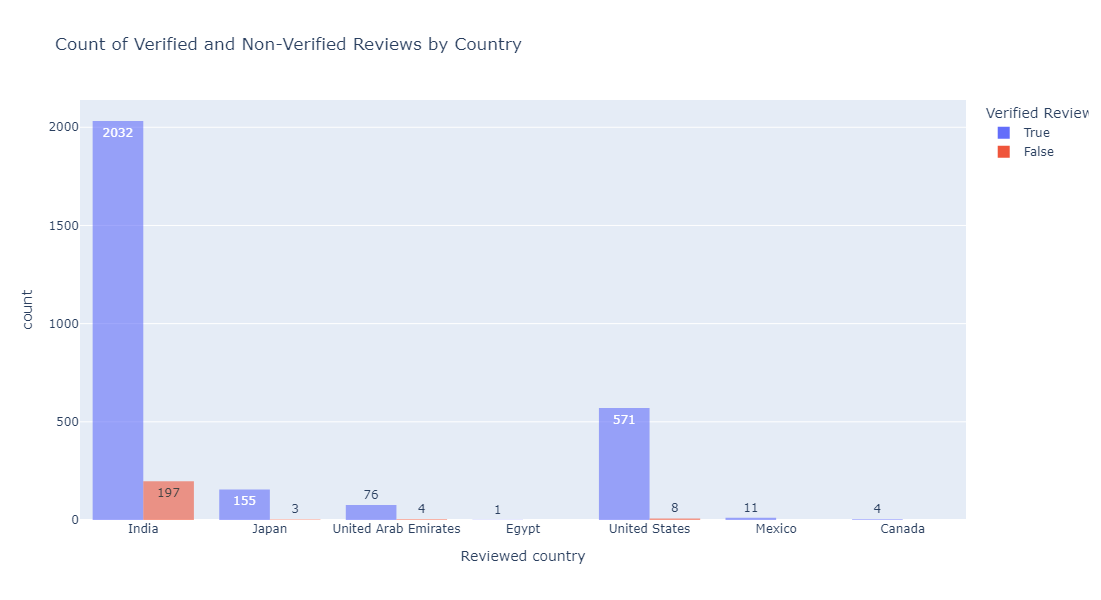

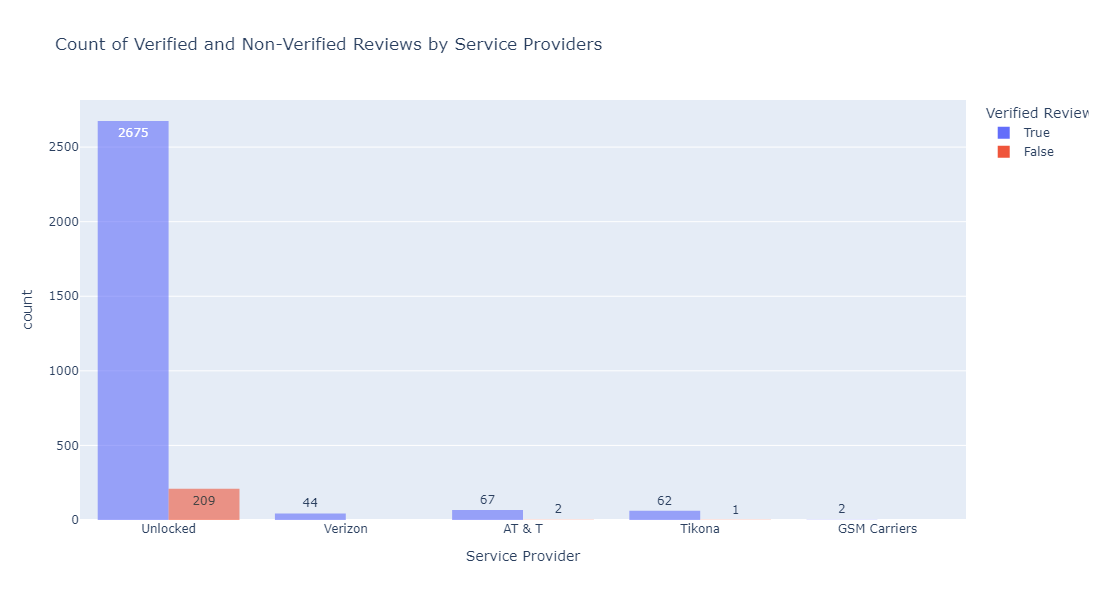

In [306]:
# Create the histogram
fig = px.histogram(
    df, 
    x='Reviewed country', 
    color='isVerified',
    title='Count of Verified and Non-Verified Reviews by Country',
    labels={'isVerified': 'Verified Review'},
    barmode='group',  # 'group' for side-by-side bars
    height=600,
    opacity = 0.6,
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Plotly
)


# Show the figure
fig.show()

# Create the histogram
fig = px.histogram(
    df, 
    x='Service Provider', 
    color='isVerified',
    title='Count of Verified and Non-Verified Reviews by Service Providers',
    labels={'isVerified': 'Verified Review'},
    barmode='group',  # 'group' for side-by-side bars
    height=600,
    opacity = 0.6,
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Show the figure
fig.show()

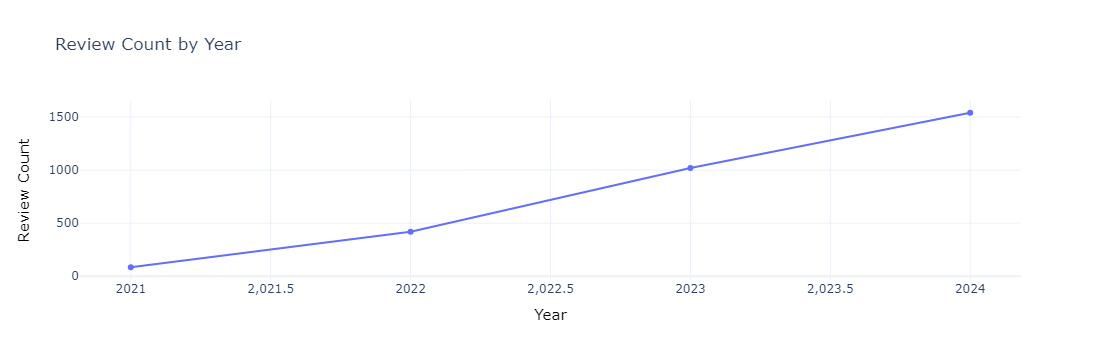

In [264]:
df['Review Date'] = pd.to_datetime(df['Review Date'], format='%d-%m-%Y', errors='coerce')

# Extract the year
df['Year'] = df['Review Date'].dt.year

# Count reviews per year
yearly_counts = df['Year'].value_counts().sort_index()

# Create a DataFrame for plotting
yearly_counts_df = yearly_counts.reset_index()
yearly_counts_df.columns = ['Year', 'Review Count']

# Create interactive line plot using Plotly
fig = px.line(yearly_counts_df, x='Year', y='Review Count', 
              title='Review Count by Year', 
              markers=True, 
              color_discrete_sequence=px.colors.qualitative.Plotly)

# Customize the layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Review Count',
    xaxis_title_font=dict(color='black', size=15),
    yaxis_title_font=dict(color='black', size=15),
    template='plotly_white'
)

# Show the plot
fig.show()

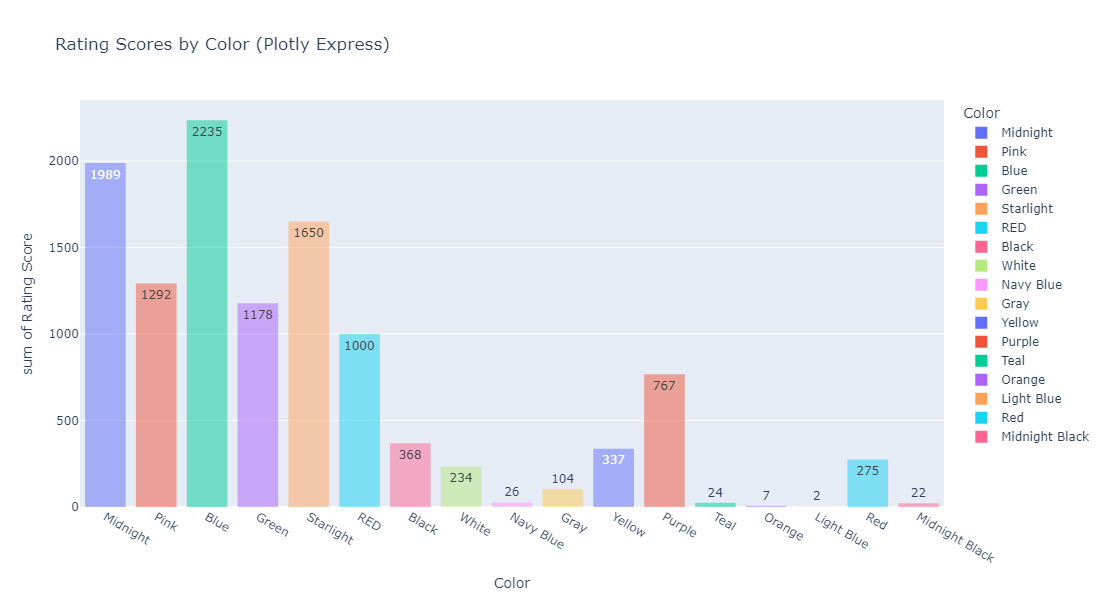

In [265]:
fig_express = px.histogram(df, x='Color', y='ratingScore', 
                            color='Color', 
                            title='Rating Scores by Color (Plotly Express)',
                            labels={'ratingScore': 'Rating Score', 'Color': 'Color'},
                            barmode='overlay',
                            text_auto=True,
                            height = 600)

# Show the Plotly Express figure
fig_express.show()

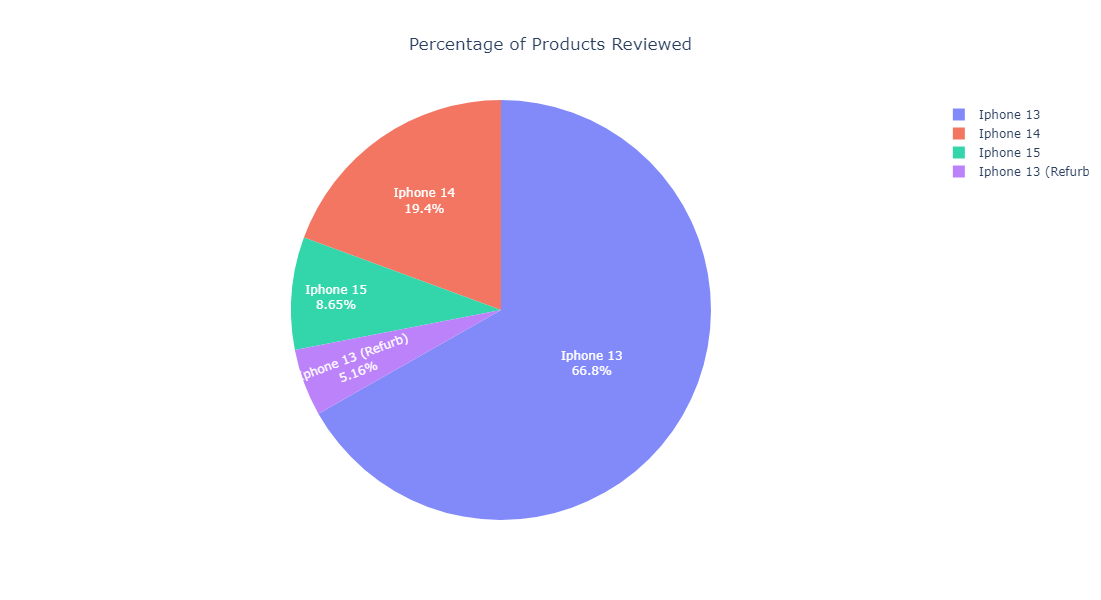

In [266]:
# pie chart
product_count = df['Product'].value_counts().reset_index()
product_count.columns = ['Product', 'Count']

# Create pie chart with white text inside
fig = px.pie(product_count, names='Product', values='Count', title='Percentage of Products Reviewed', opacity = 0.8)

# Update the text inside the pie chart to white
fig.update_traces(textinfo='percent+label', insidetextfont=dict(color='white'))

fig.update_layout(width=1100, height=600, title_x=0.5, title_xanchor='center')

# Display the pie chart
fig.show()

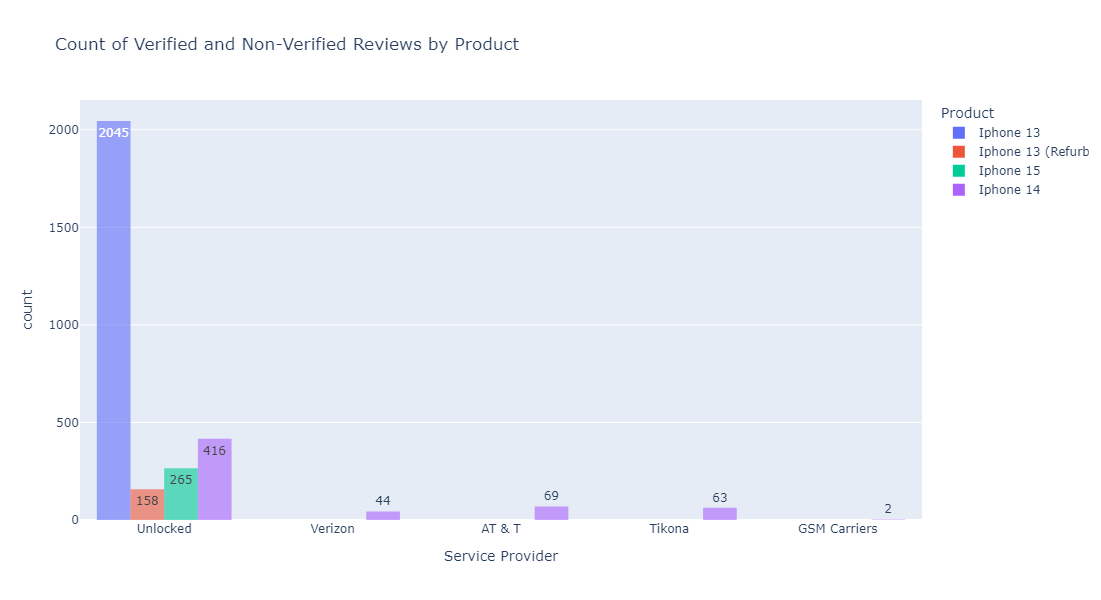

In [307]:
# Create the histogram
fig = px.histogram(
    df, 
    x='Service Provider', 
    color='Product',
    title='Count of Verified and Non-Verified Reviews by Product',
    labels={'isVerified': 'Verified Review'},
    barmode='group',  # 'group' for side-by-side bars
    height=600,
    opacity = 0.6,
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Show the figure
fig.show()

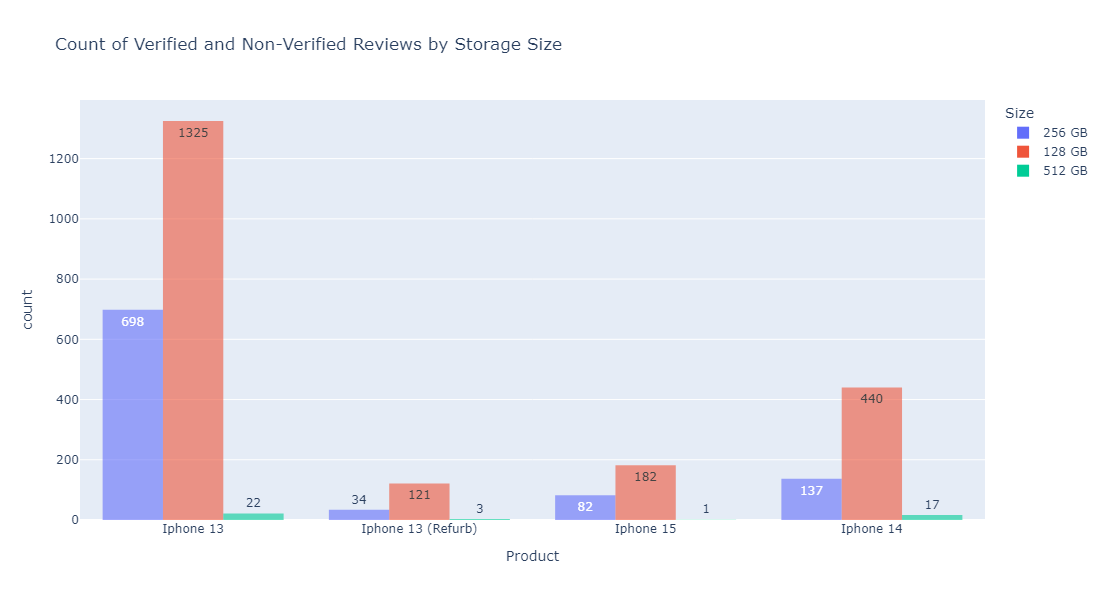

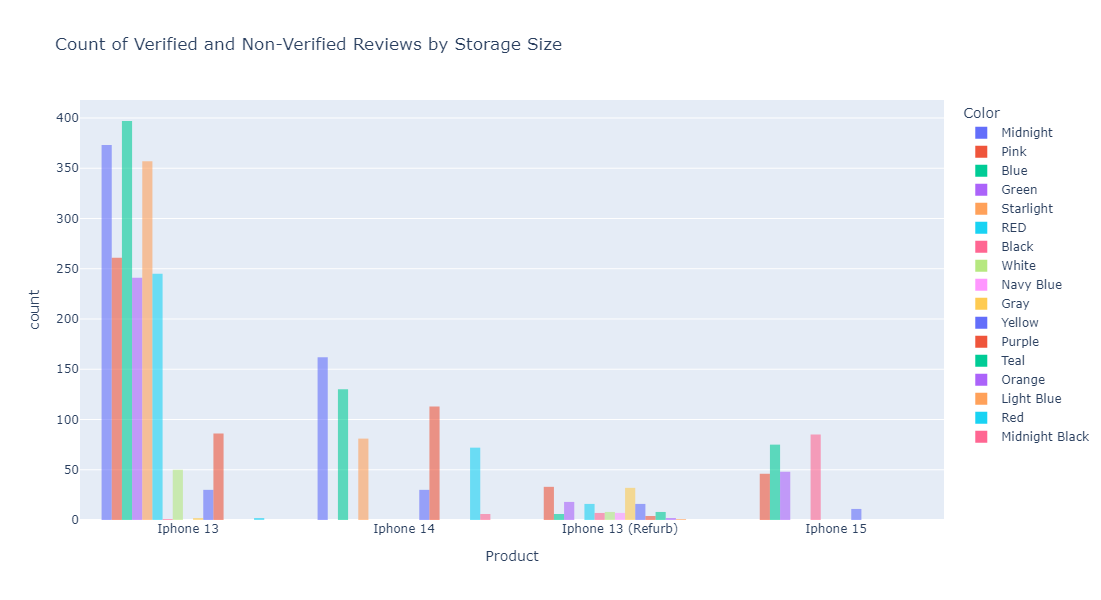

In [309]:
# Create the histogram
fig = px.histogram(
    df, 
    x='Product',
    color='Size',
    title='Count of Verified and Non-Verified Reviews by Storage Size',
    labels={'isVerified': 'Verified Review'},
    barmode='group',  # 'group' for side-by-side bars
    height=600,
    opacity = 0.6,
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Show the figure
fig.show()

# Create the histogram
fig = px.histogram(
    df, 
    x='Product',
    color='Color',
    title='Count of Verified and Non-Verified Reviews by Storage Size',
    labels={'isVerified': 'Verified Review'},
    barmode='group',  # 'group' for side-by-side bars
    height=600,
    opacity = 0.6,
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Show the figure
fig.show()

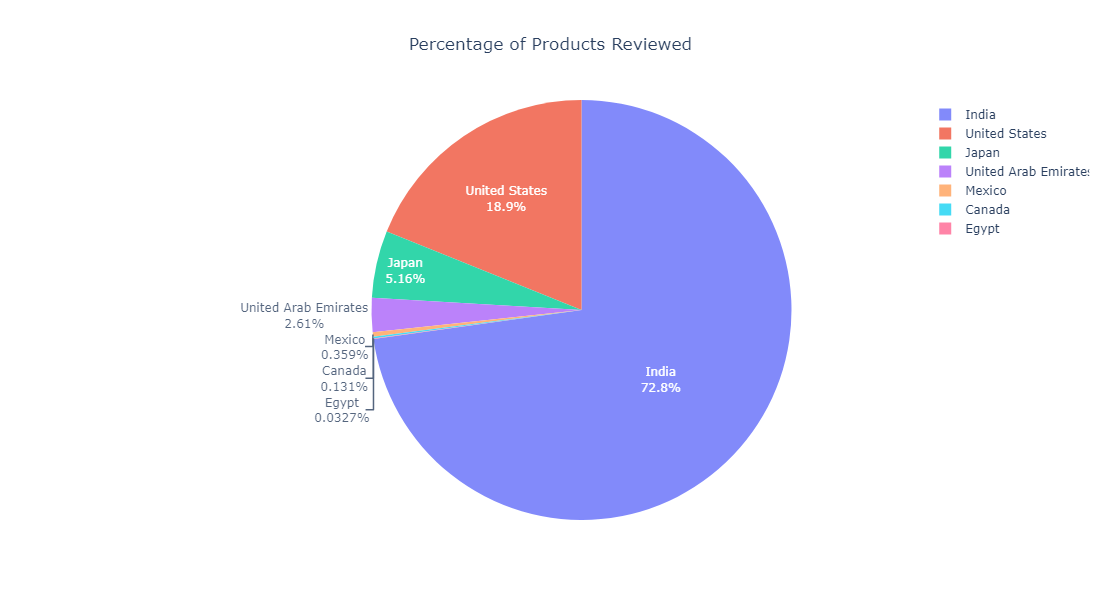

In [274]:
# pie chart
product_count = df['Reviewed country'].value_counts().reset_index()
product_count.columns = ['Reviewed country', 'Count']

# Create pie chart with white text inside
fig = px.pie(product_count, names='Reviewed country', values='Count', title='Percentage of Products Reviewed', opacity = 0.8)

# Update the text inside the pie chart to white
fig.update_traces(textinfo='percent+label', insidetextfont=dict(color='white'))

fig.update_layout(width=1100, height=600, title_x=0.5, title_xanchor='center')

# Display the pie chart
fig.show()

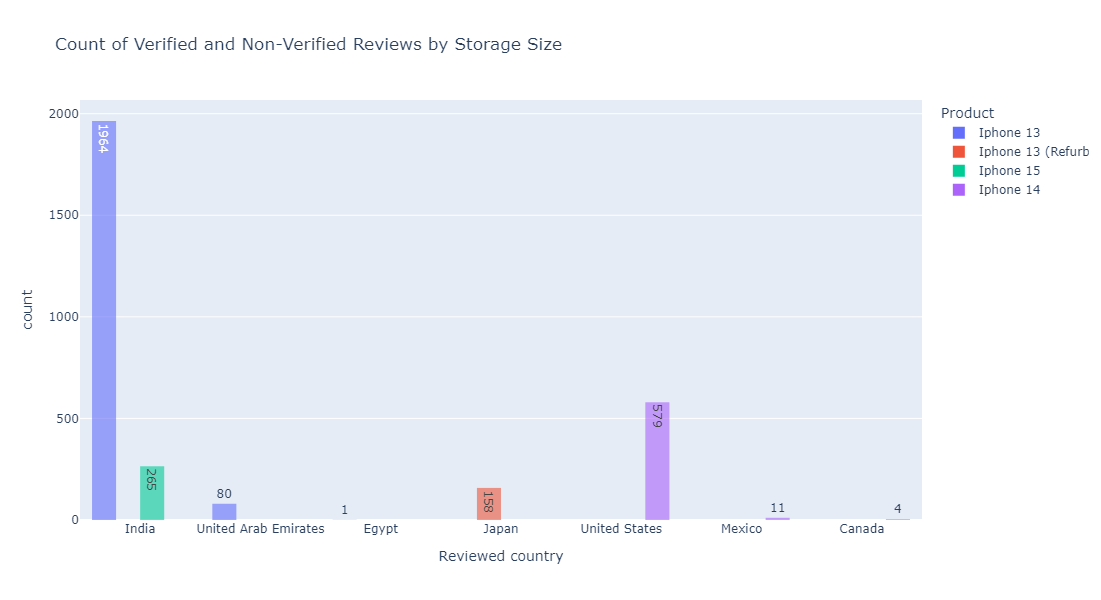

In [310]:
# Create the histogram
fig = px.histogram(
    df, 
    x='Reviewed country',
    color='Product',
    title='Count of Verified and Non-Verified Reviews by Storage Size',
    labels={'isVerified': 'Verified Review'},
    barmode='group',  # 'group' for side-by-side bars
    height=600,
    opacity = 0.6,
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Show the figure
fig.show()

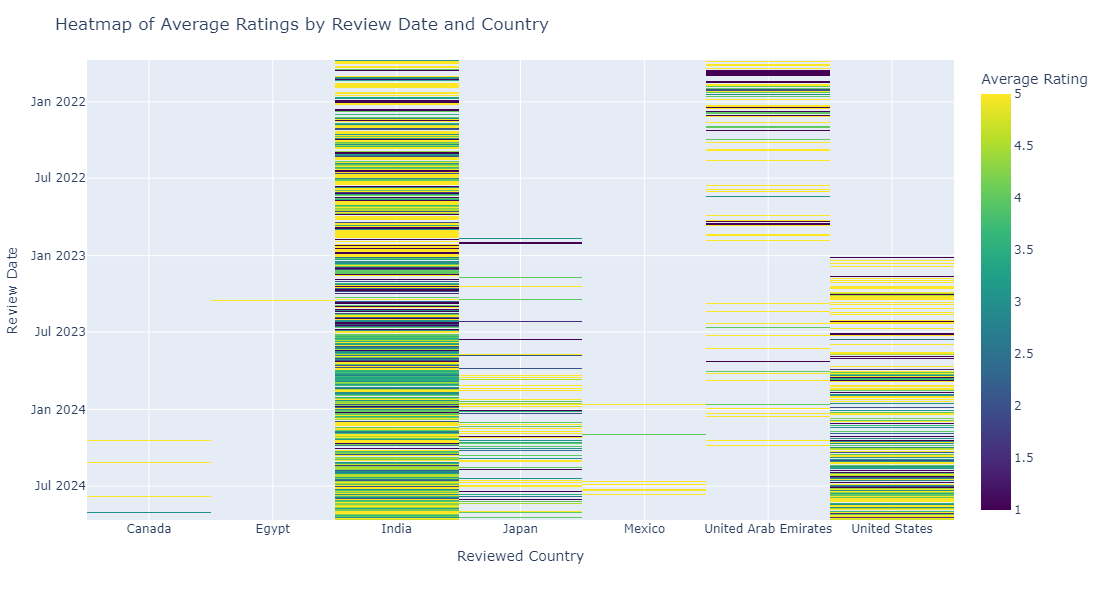

In [284]:
df['Review Date'] = pd.to_datetime(df['Review Date'])

# Group by 'Reviewed country' and 'Review Date' and calculate the mean rating score
heatmap_data = df.groupby(['Reviewed country', 'Review Date'])['ratingScore'].mean().reset_index()

# Create a heatmap with swapped axes
heatmap_pivot = heatmap_data.pivot(index="Review Date", columns="Reviewed country", values="ratingScore")

# Create the heatmap using imshow
fig = px.imshow(
    heatmap_pivot,
    labels=dict(x="Reviewed Country", y="Review Date", color="Average Rating"),
    color_continuous_scale="Viridis"
)

# Update layout
fig.update_layout(title='Heatmap of Average Ratings by Review Date and Country', xaxis_title='Reviewed Country', yaxis_title='Review Date', height = 600)

# Show the heatmap
fig.show()